# **Classifying Irrigation Stress Levels in Wheat / Cotton Fields Using Soil Metrics**

## **Project Overview**
This project aims to classify irrigation stress levels (Low, Moderate, High) in cotton fields based on soil metrics such as **moisture, temperature, and salinity**.  
The dataset comes from **ICARDA (Uzbekistan)** and consists of tabular sensor data collected from multiple hydromodule zones (DavlanGanimat, QahramonDS, ToshpulatovGS).

## **Objectives**
1. Preprocess soil metric data from different hydromodule zones.
2. Train machine learning models (e.g., Random Forest, XGBoost) to classify irrigation stress levels.
3. Evaluate performance using accuracy, precision, recall, and F1-score.
4. Use Explainable AI (XAI) tools such as **SHAP** or **LIME** to interpret feature contributions.


## **Step 1: Importing Libraries**
Here, we import all essential Python libraries for:
- Data handling: `pandas`, `numpy`
- Visualization: `matplotlib`, `seaborn`
- Machine learning: `scikit-learn`
- Model explainability: `shap`
- Warning suppression for cleaner output


In [ ]:
# STEP 1: Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import warnings
warnings.filterwarnings('ignore')


## **Step 2: Loading Datasets**

Each dataset is separated by semicolons, so we use `delimiter=';'`.  
We then check structure (`.info()`) to see:
- Number of rows and columns  
- Column names and data types  
- Missing values  



In [ ]:
# STEP 2: Load the three CSV datasets and combine them

df1 = pd.read_csv('/content/DavlanGanimat_II_HMZ_Cotton.csv', delimiter=';')
df2 = pd.read_csv('/content/QahramonDS_I_HMZ_Cotton.csv', delimiter=';')
df3 = pd.read_csv('/content/ToshpulatovGS_VII_HMZ_Cotton.csv', delimiter=';')


# Display basic info
print("DavlanGanimat Dataset:")
print(df1.info(), "\n")
print("QahramonDS Dataset:")
print(df2.info(), "\n")
print("ToshpulatovGS Dataset:")
print(df3.info())

DavlanGanimat Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               640 non-null    int64  
 1   Horizon            640 non-null    int64  
 2   M_S7_Moisture      640 non-null    float64
 3   M_S7_Temperature   640 non-null    float64
 4   M_S7_Salinity      640 non-null    float64
 5   M_S8_Moisture      640 non-null    float64
 6   M_S8_Temperature   640 non-null    float64
 7   M_S8_Salinity      640 non-null    float64
 8   M_S9_Moisture      640 non-null    float64
 9   M_S9_Temperature   640 non-null    float64
 10  M_S9_Salinity      640 non-null    float64
 11  T_S10_Moisture     640 non-null    float64
 12  T_S10_Temperature  640 non-null    float64
 13  T_S10_Salinity     640 non-null    float64
 14  T_S11_Moisture     640 non-null    float64
 15  T_S11_Temperature  640 non-null    float64
 16  T_S

### **Step 3: Previewing the Data**
We show:
- First 3 rows of each dataset  
- A summary of missing values in key columns  
This helps us understand data quality and availability of sensor readings per zone.  



In [ ]:
# STEP 3: Preview and summarize
for name, df in zip(["DavlanGanimat", "QahramonDS", "ToshpulatovGS"], [df1, df2, df3]):
    print(f"\n {name} Dataset Preview:")
    display(df.head(3))
    print("\nMissing Values Summary:")
    print(df.isnull().sum().head(10))



 DavlanGanimat Dataset Preview:


,Date,Horizon,M_S7_Moisture,M_S7_Temperature,M_S7_Salinity,M_S8_Moisture,M_S8_Temperature,M_S8_Salinity,M_S9_Moisture,M_S9_Temperature,M_S9_Salinity,T_S10_Moisture,T_S10_Temperature,T_S10_Salinity,T_S11_Moisture,T_S11_Temperature,T_S11_Salinity,T_S12_Moisture,T_S12_Temperature,T_S12_Salinity
0,20150404,15,9.94,18.0,1.5,15.35,19.0,2.2,31.85,18.6,2.5,25.54,17.5,1.5,29.65,17.1,2.2,21.35,16.9,1.5
1,20150404,30,7.18,18.1,1.0,20.22,18.9,1.9,29.02,18.5,2.3,23.57,17.4,1.5,28.11,17.1,2.6,20.14,16.9,1.1
2,20150404,45,16.19,18.3,0.7,25.44,19.0,1.5,28.22,18.5,2.0,25.47,17.5,2.0,26.12,17.2,1.8,24.02,16.8,1.5



Missing Values Summary:
Date                0
Horizon             0
M_S7_Moisture       0
M_S7_Temperature    0
M_S7_Salinity       0
M_S8_Moisture       0
M_S8_Temperature    0
M_S8_Salinity       0
M_S9_Moisture       0
M_S9_Temperature    0
dtype: int64

 QahramonDS Dataset Preview:


,Date,Horizon,M_S7_Moisture,M_S7_Temperature,M_S7_Salinity,M_S8_Moisture,M_S8_Temperature,M_S8_Salinity,M_S9_Moisture,M_S9_Temperature,M_S9_Salinity,T_S10_Moisture,T_S10_Temperature,T_S10_Salinity,T_S11_Moisture,T_S11_Temperature,T_S11_Salinity,T_S12_Moisture,T_S12_Temperature,T_S12_Salinity
0,20150429,15,22.42,27.1,2.0,14.60,28.1,1.8,9.39,28.4,1.8,19.57,28.3,2.1,19.38,28.0,2.1,22.13,27.8,2.2
1,20150429,30,24.48,27.3,2.3,12.04,28.2,2.0,13.88,28.4,1.1,17.18,28.3,1.5,24.36,28.0,2.5,14.64,27.8,2.3
2,20150429,45,28.13,27.3,3.3,11.86,28.3,2.3,15.28,28.5,0.9,15.41,28.3,1.8,25.64,28.1,2.4,10.97,27.9,1.9



Missing Values Summary:
Date                0
Horizon             0
M_S7_Moisture       0
M_S7_Temperature    0
M_S7_Salinity       0
M_S8_Moisture       0
M_S8_Temperature    0
M_S8_Salinity       0
M_S9_Moisture       0
M_S9_Temperature    0
dtype: int64

 ToshpulatovGS Dataset Preview:


,Date,Horizon,M_S1_Moisture,M_S1_Temperature,M_S1_Salinity,M_S2_Moisture,M_S2_Temperature,M_S2_Salinity,M_S3_Moisture,M_S3_Temperature,M_S3_Salinity,T_S4_Moisture,T_S4_Temperature,T_S4_Salinity,T_S5_Moisture,T_S5_Temperature,T_S5_Salinity,T_S6_Moisture,T_S6_Temperature,T_S6_Salinity
0,20150423,15,26.93,22.5,3.1,19.99,22.8,1.3,19.92,23.2,1.3,11.47,23.5,1.4,20.21,23.9,2.3,16.53,24.0,2.3
1,20150423,30,23.00,22.5,2.6,21.87,22.9,1.9,13.90,23.4,0.9,15.94,23.7,1.8,18.83,23.9,2.8,13.89,24.0,2.2
2,20150423,45,23.84,22.4,3.0,22.06,22.9,2.9,15.95,23.3,1.3,15.94,23.7,2.5,18.08,24.0,2.8,15.88,24.1,2.3



Missing Values Summary:
Date                0
Horizon             0
M_S1_Moisture       0
M_S1_Temperature    0
M_S1_Salinity       0
M_S2_Moisture       0
M_S2_Temperature    0
M_S2_Salinity       0
M_S3_Moisture       0
M_S3_Temperature    0
dtype: int64


## **Step 4: Descriptive Statistics**
We use `.describe()` to check:
- Mean, min, max of each feature  
- Data range and variability  


In [ ]:
# STEP 4: Descriptive statistics for numerical columns
for name, df in zip(["DavlanGanimat", "QahramonDS", "ToshpulatovGS"], [df1, df2, df3]):
    print(f"\n Summary Statistics for {name}")
    display(df.describe().T)



 Summary Statistics for DavlanGanimat


,count,mean,std,min,25%,50%,75%,max
Date,640.0,2.015066e+07,114.992889,20150404.00,2.015060e+07,2.015063e+07,2.015073e+07,20150829.00
Horizon,640.0,8.250000e+01,43.117919,15.00,4.500000e+01,8.250000e+01,1.200000e+02,150.00
M_S7_Moisture,640.0,2.624150e+01,5.173862,4.06,2.547750e+01,2.715000e+01,2.902500e+01,40.35
M_S7_Temperature,640.0,3.027578e+01,4.896477,3.40,2.720000e+01,3.080000e+01,3.340000e+01,40.20
M_S7_Salinity,640.0,3.464219e+00,0.916473,0.00,3.100000e+00,3.700000e+00,4.000000e+00,5.00
M_S8_Moisture,640.0,2.176886e+01,5.615023,4.56,1.895000e+01,2.305000e+01,2.539250e+01,37.24
M_S8_Temperature,640.0,3.023656e+01,4.385194,18.60,2.750000e+01,3.070000e+01,3.310000e+01,39.40
M_S8_Salinity,640.0,2.631250e+00,1.034729,0.20,1.900000e+00,2.700000e+00,3.300000e+00,4.70
M_S9_Moisture,640.0,1.934488e+01,5.777983,2.11,1.602750e+01,2.085500e+01,2.349250e+01,31.85
M_S9_Temperature,640.0,2.986328e+01,4.093318,18.00,2.740000e+01,3.040000e+01,3.242500e+01,38.10



 Summary Statistics for QahramonDS


,count,mean,std,min,25%,50%,75%,max
Date,440.0,2.015063e+07,81.733598,20150429.00,2.015060e+07,2.015062e+07,2.015071e+07,20150802.00
Horizon,440.0,8.250000e+01,43.133263,15.00,4.500000e+01,8.250000e+01,1.200000e+02,150.00
M_S7_Moisture,440.0,2.766980e+01,4.645784,9.80,2.475250e+01,2.902500e+01,3.067250e+01,41.39
M_S7_Temperature,440.0,3.306841e+01,3.662570,3.90,3.057500e+01,3.335000e+01,3.540000e+01,42.10
M_S7_Salinity,440.0,3.446818e+00,0.604643,1.80,3.175000e+00,3.600000e+00,3.900000e+00,4.40
M_S8_Moisture,440.0,1.760943e+01,6.303449,3.99,1.309750e+01,1.647000e+01,2.258000e+01,35.38
M_S8_Temperature,440.0,3.324386e+01,3.160096,26.80,3.100000e+01,3.330000e+01,3.540000e+01,41.80
M_S8_Salinity,440.0,2.194318e+00,0.699586,0.60,1.800000e+00,2.100000e+00,2.700000e+00,4.10
M_S9_Moisture,440.0,1.635095e+01,7.362719,0.00,1.355000e+01,1.609500e+01,1.992250e+01,92.54
M_S9_Temperature,440.0,3.308591e+01,2.930397,26.90,3.100000e+01,3.310000e+01,3.520000e+01,40.80



 Summary Statistics for ToshpulatovGS


,count,mean,std,min,25%,50%,75%,max
Date,530.0,2.015063e+07,92.386871,20150423.00,2.015060e+07,2.015062e+07,2.015071e+07,20150802.00
Horizon,530.0,8.250000e+01,43.124923,15.00,4.500000e+01,8.250000e+01,1.200000e+02,150.00
M_S1_Moisture,530.0,2.281896e+01,4.227833,8.65,1.961250e+01,2.240500e+01,2.701000e+01,30.93
M_S1_Temperature,530.0,3.179396e+01,4.624031,20.50,2.810000e+01,3.220000e+01,3.557500e+01,39.30
M_S1_Salinity,530.0,3.441887e+00,0.571322,2.30,3.000000e+00,3.400000e+00,3.900000e+00,4.70
M_S2_Moisture,530.0,2.511581e+01,4.882045,9.96,2.099250e+01,2.581500e+01,2.927500e+01,37.12
M_S2_Temperature,530.0,3.206338e+01,4.391727,21.10,2.900000e+01,3.270000e+01,3.577500e+01,39.30
M_S2_Salinity,530.0,2.965472e+00,0.721815,1.10,2.400000e+00,3.000000e+00,3.600000e+00,4.40
M_S3_Moisture,530.0,1.740236e+01,5.444719,7.94,1.281250e+01,1.659500e+01,2.155250e+01,53.90
M_S3_Temperature,530.0,3.199189e+01,4.068398,21.60,2.920000e+01,3.250000e+01,3.530000e+01,38.70


## **Step 5: Feature Distributions**
These histograms show the spread of moisture, temperature, and salinity values.  
We can identify:
- Normal vs skewed distributions  
- Outliers or measurement differences across zones  


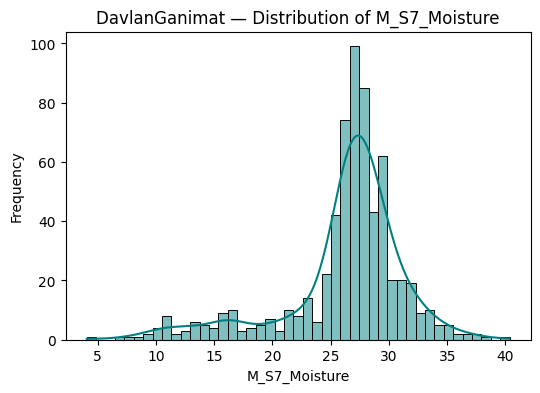

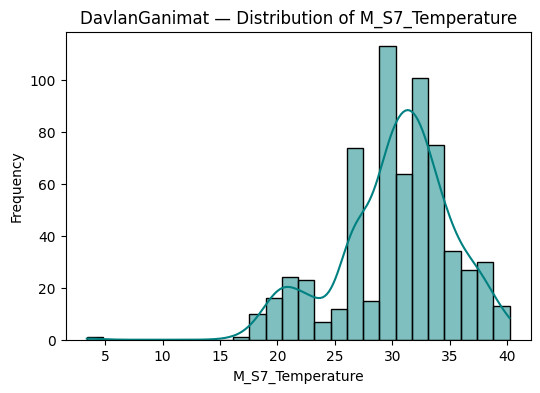

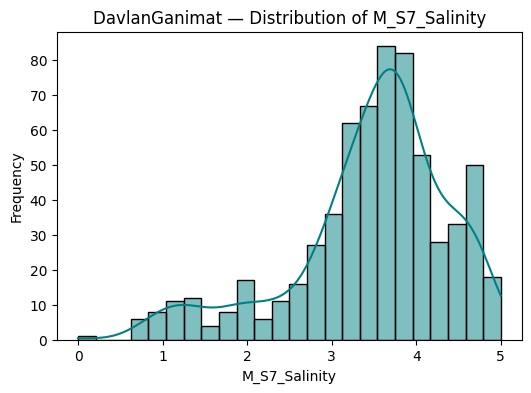

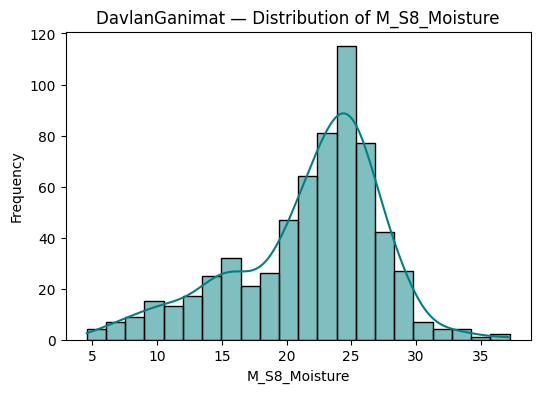

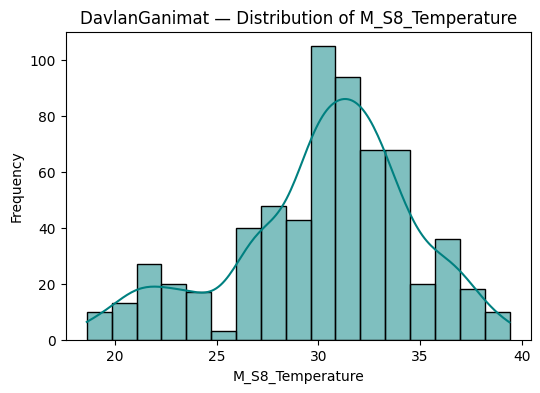

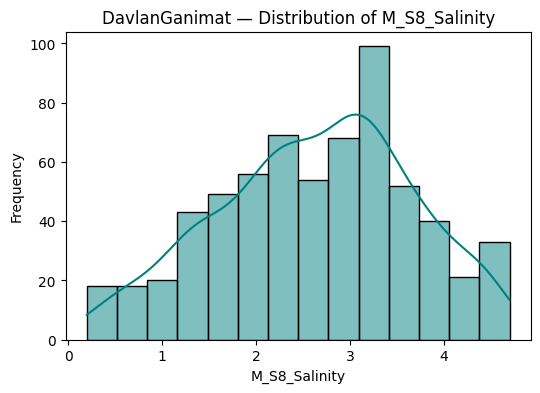

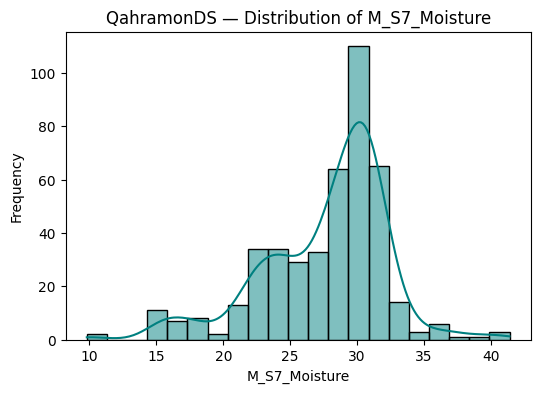

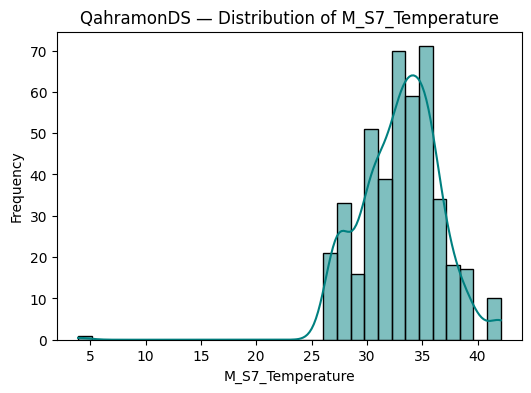

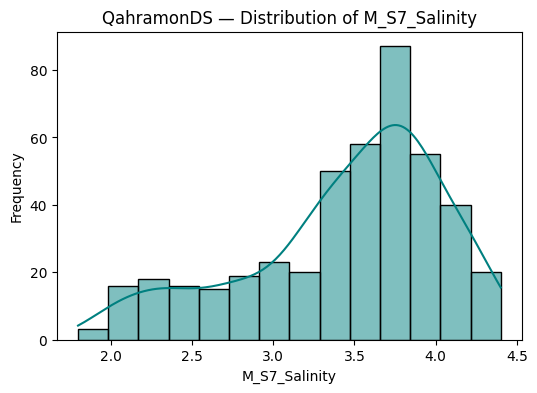

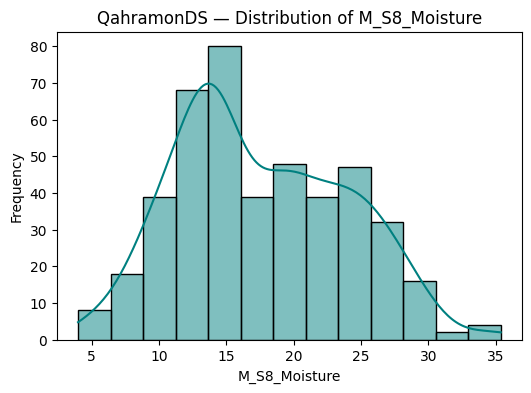

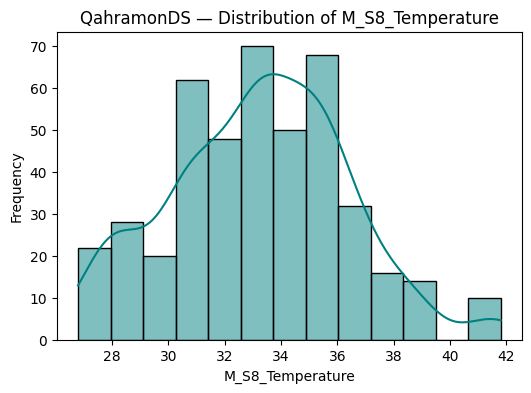

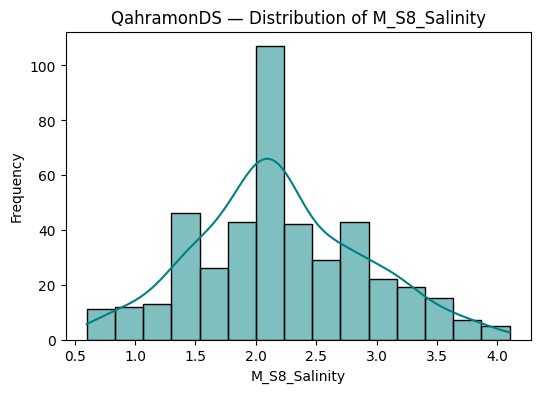

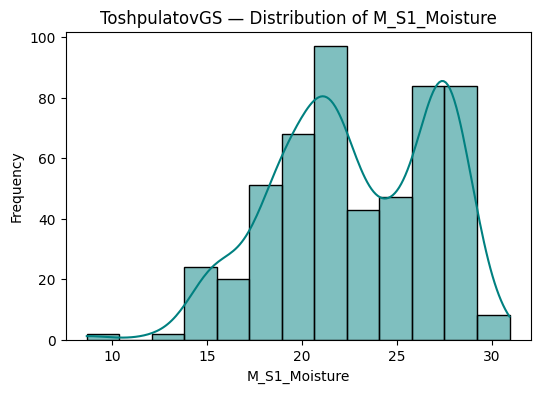

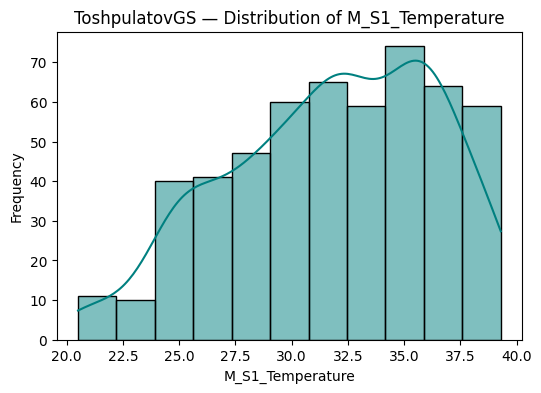

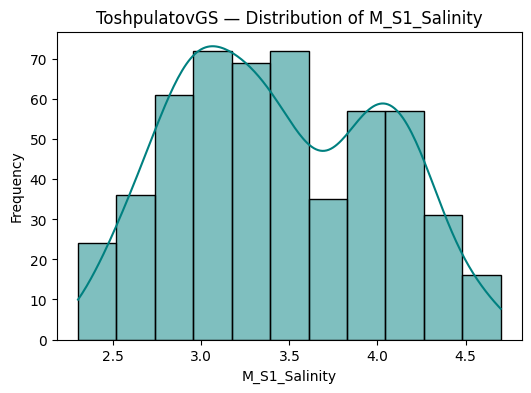

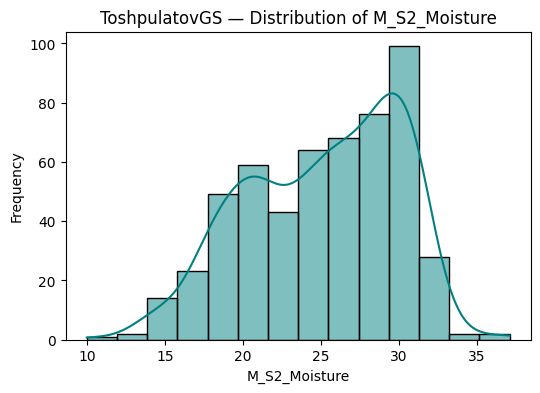

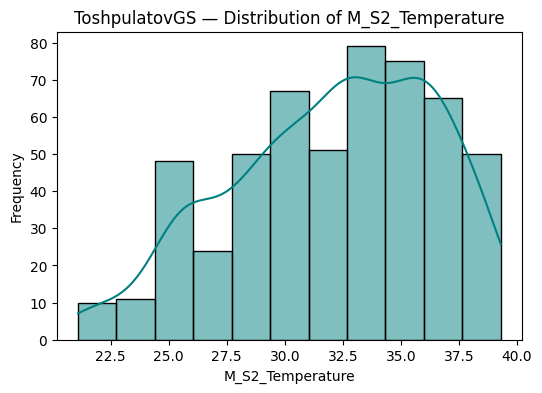

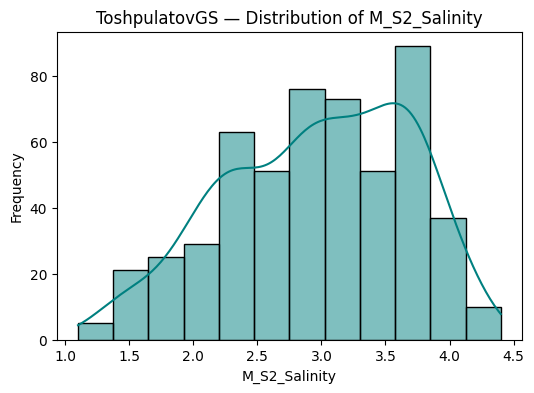

In [ ]:
# STEP 5: Distribution plots for key features
def plot_distributions(df, zone_name):
    features = [col for col in df.columns if any(k in col for k in ['Moisture','Temperature','Salinity'])]
    numeric_cols = [col for col in features if df[col].dtype != 'object']

    for col in numeric_cols[:6]:  # limit plots to first 6 for clarity
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), kde=True, color='teal')
        plt.title(f'{zone_name} — Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

plot_distributions(df1, "DavlanGanimat")
plot_distributions(df2, "QahramonDS")
plot_distributions(df3, "ToshpulatovGS")


## **Step 6: Correlation Heatmaps**
Correlation matrices reveal relationships among soil features.  
For example, moisture may be negatively correlated with salinity in some zones.  
Such patterns help identify key predictors for irrigation stress.  


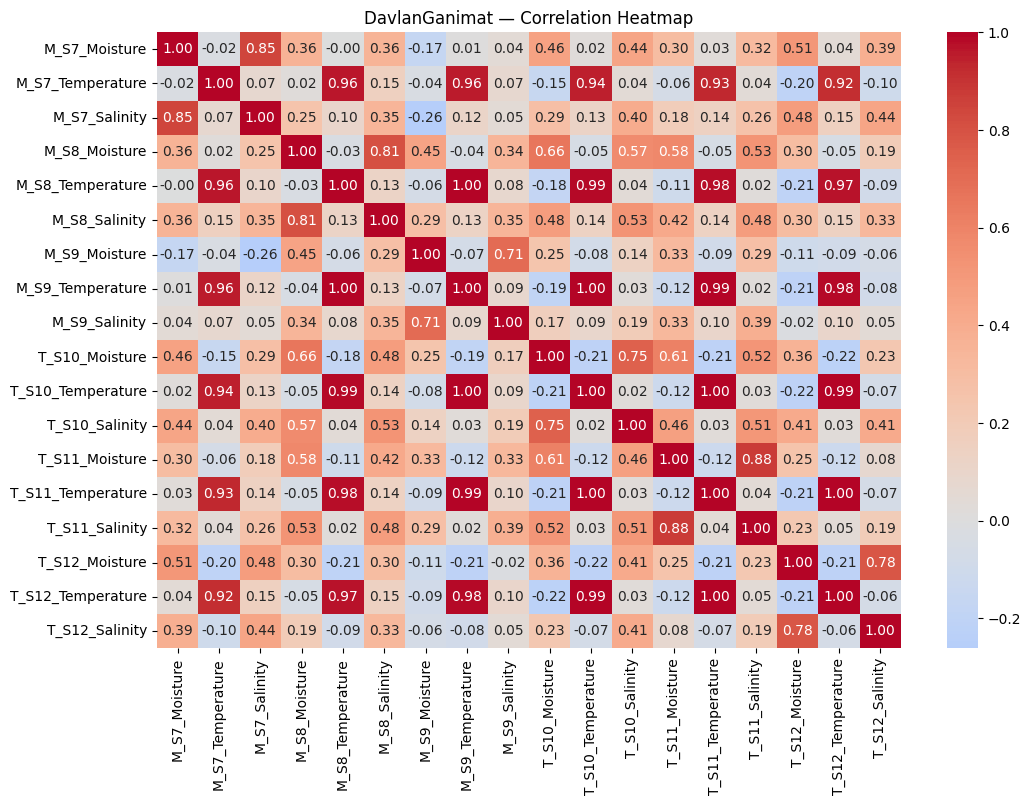

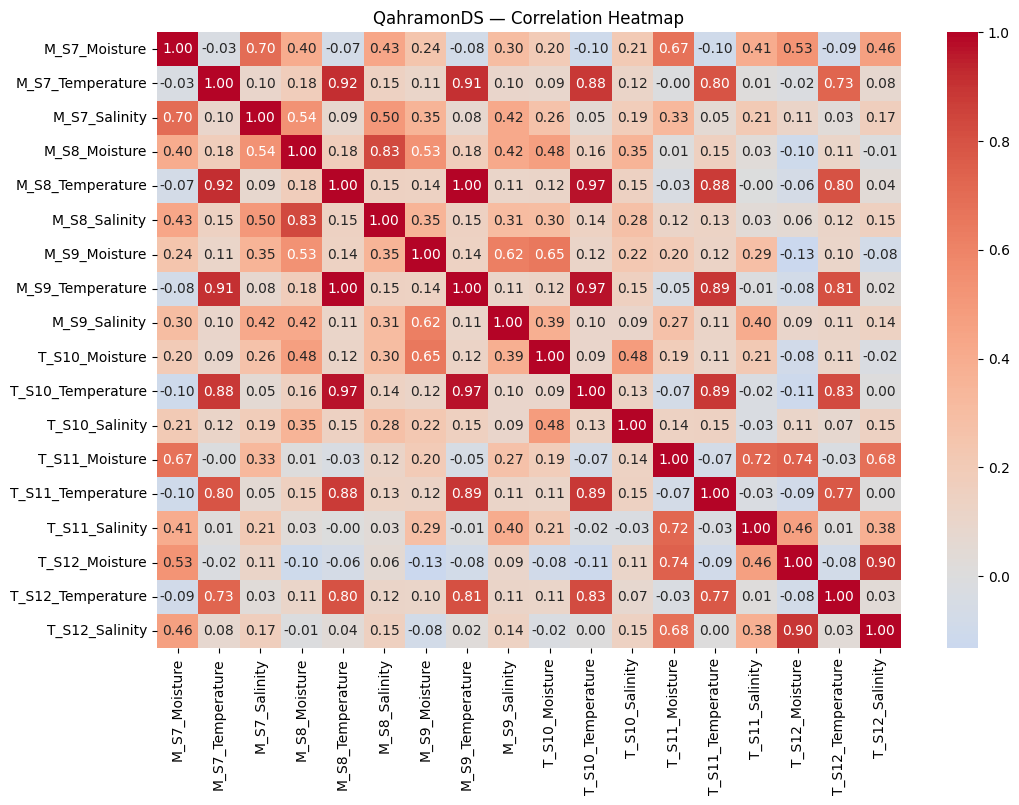

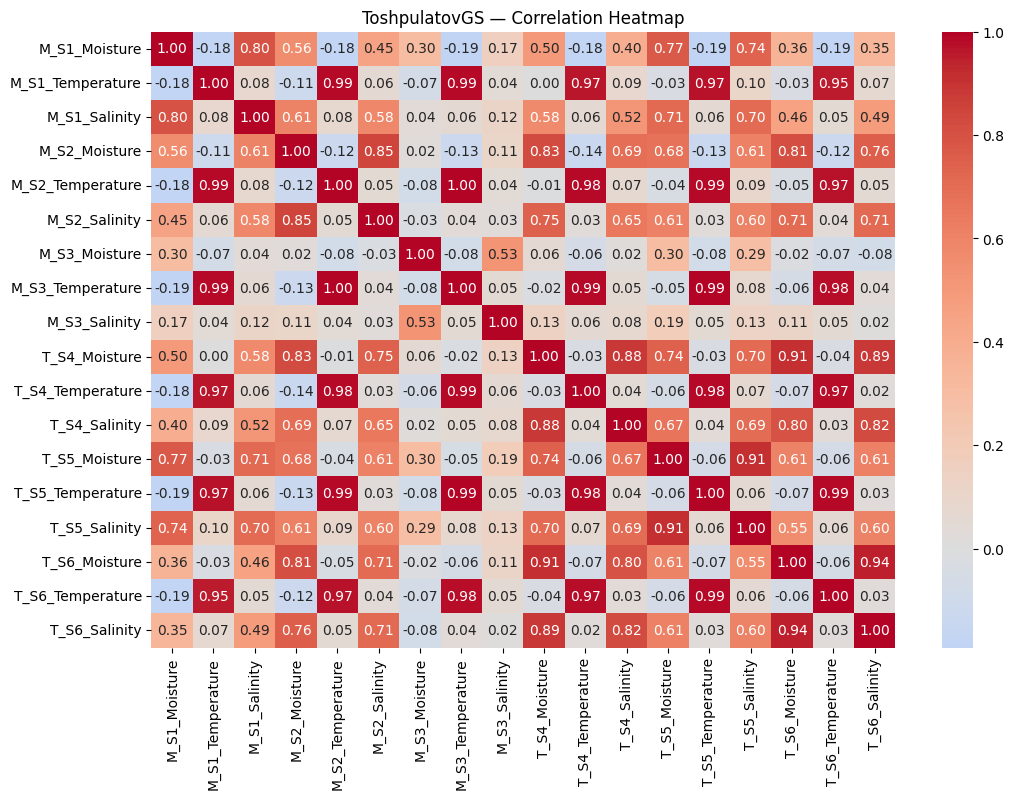

In [ ]:
# STEP 6: Correlation analysis
def plot_correlation(df, zone_name):
    features = [col for col in df.columns if any(k in col for k in ['Moisture','Temperature','Salinity'])]
    corr = df[features].corr(numeric_only=True)
    plt.figure(figsize=(12, 8)) # Increased figure size
    sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f") # Added fmt=".2f"
    plt.title(f'{zone_name} — Correlation Heatmap')
    plt.show()

plot_correlation(df1, "DavlanGanimat")
plot_correlation(df2, "QahramonDS")
plot_correlation(df3, "ToshpulatovGS")

# **Create `stress_level` target (Low / Moderate / High)**

We derive `stress_level` using a representative moisture column per dataset.
Method:
- Choose the first column that contains "Moisture".
- Replace NaNs in that moisture column by its mean.
- Use `pd.qcut` to create 3 quantile-based bins:
  - Low Stress = lowest moisture quantile (labelled "High Stress" because low moisture => high irrigation stress)
  - Moderate Stress = middle
  - Low Stress = highest moisture values

This is a pragmatic approach for labeling when expert thresholds are not available.


In [ ]:
def create_stress_labels(df, zone_name):
    moisture_cols = [c for c in df.columns if 'Moisture' in c or 'moisture' in c]
    if not moisture_cols:
        raise ValueError(f"No moisture columns found in {zone_name}")
    main_col = moisture_cols[0]
    # fill NA with mean (only for label creation)
    vals = df[main_col].fillna(df[main_col].mean())
    # We want the LOWEST moisture -> High Stress. Use qcut and label accordingly.
    df['stress_level'] = pd.qcut(vals, q=3, labels=['High Stress','Moderate Stress','Low Stress'])
    print(f"Created 'stress_level' for {zone_name} using {main_col} ({main_col} mean={vals.mean():.3f})")
    return df, main_col

df1, m1 = create_stress_labels(df1, "DavlanGanimat")
df2, m2 = create_stress_labels(df2, "QahramonDS")
df3, m3 = create_stress_labels(df3, "ToshpulatovGS")


Created 'stress_level' for DavlanGanimat using M_S7_Moisture (M_S7_Moisture mean=26.241)
Created 'stress_level' for QahramonDS using M_S7_Moisture (M_S7_Moisture mean=27.670)
Created 'stress_level' for ToshpulatovGS using M_S1_Moisture (M_S1_Moisture mean=22.819)


In [ ]:
df1.stress_level.value_counts()

,count
stress_level,
High Stress,214
Low Stress,214
Moderate Stress,212


In [ ]:
df2.stress_level.value_counts()

,count
stress_level,
Moderate Stress,148
High Stress,147
Low Stress,145


In [ ]:
df3.stress_level.value_counts()

,count
stress_level,
High Stress,177
Low Stress,177
Moderate Stress,176


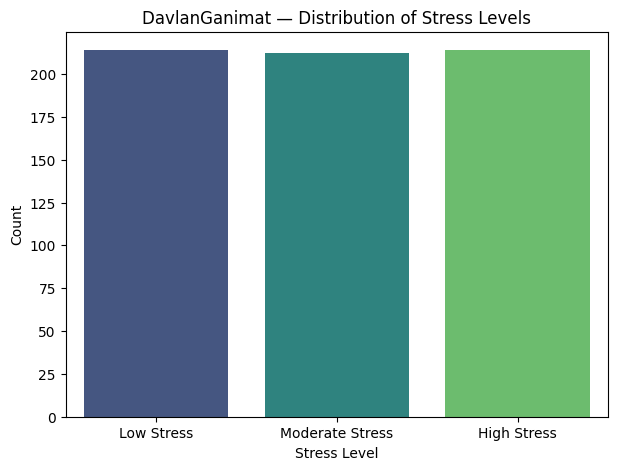

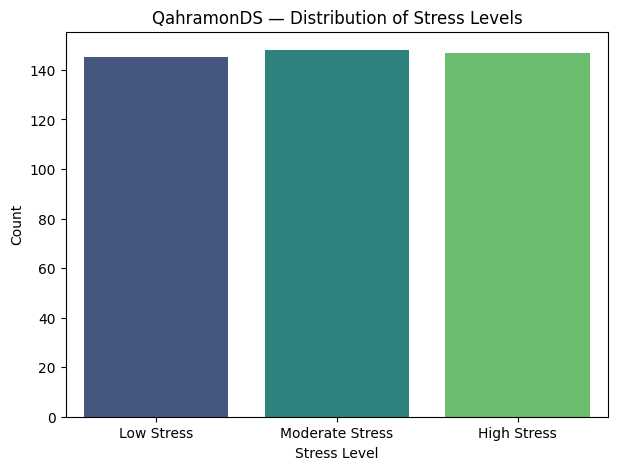

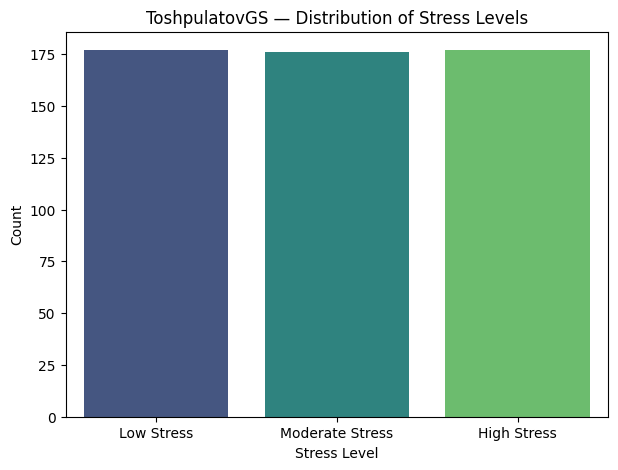

In [ ]:
def plot_stress_level_distribution(df, zone_name):
    plt.figure(figsize=(7, 5))
    sns.countplot(x='stress_level', data=df, palette='viridis', order=['Low Stress', 'Moderate Stress', 'High Stress'])
    plt.title(f'{zone_name} — Distribution of Stress Levels')
    plt.xlabel('Stress Level')
    plt.ylabel('Count')
    plt.show()

plot_stress_level_distribution(df1, "DavlanGanimat")
plot_stress_level_distribution(df2, "QahramonDS")
plot_stress_level_distribution(df3, "ToshpulatovGS")

# **Feature selection and preprocessing**
- Select columns with names containing 'Moisture', 'Temperature', or 'Salinity'.
- Replace missing values with column mean.
- Scale features using StandardScaler (only for models that benefit from scaling; tree models are robust but we scale consistently).
- Encode labels into integers.
- Split into train/test (80/20).


In [ ]:
from collections import OrderedDict

def prepare_zone(df):
    features = [c for c in df.columns if any(k in c for k in ['Moisture','Temperature','Salinity','moisture','temperature','salinity'])]
    X = df[features].copy()
    # Fill missing with column mean
    X = X.fillna(X.mean())
    y = df['stress_level'].astype(str).copy()
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return {
        'X': X,
        'X_scaled': X_scaled,
        'y': y,
        'y_enc': y_enc,
        'features': features,
        'label_encoder': le,
        'scaler': scaler
    }

zone1 = prepare_zone(df1)
zone2 = prepare_zone(df2)
zone3 = prepare_zone(df3)

# train/test split helper
def split_zone(zone_dict, test_size=0.2, random_state=42):
    Xtr, Xte, ytr, yte = train_test_split(zone_dict['X_scaled'], zone_dict['y_enc'], test_size=test_size, random_state=random_state, stratify=zone_dict['y_enc'])
    return Xtr, Xte, ytr, yte

X1_train, X1_test, y1_train, y1_test = split_zone(zone1)
X2_train, X2_test, y2_train, y2_test = split_zone(zone2)
X3_train, X3_test, y3_train, y3_test = split_zone(zone3)

print("Prepared zones with features counts:", len(zone1['features']), len(zone2['features']), len(zone3['features']))


Prepared zones with features counts: 18 18 18


# **Train multiple models per zone**
We train:
- Random Forest (RF)
- XGBoost (XGB)
- Logistic Regression (LR) — simple linear baseline

For each model, we save accuracy, classification report, and confusion matrix.


In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_models(X_train, X_test, y_train, y_test, feature_names, zone_name):
    results = {}



    # 3. Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    pred_lr = lr.predict(X_test)
    results['LogisticRegression'] = {'model': lr, 'y_pred': pred_lr, 'acc': accuracy_score(y_test, pred_lr)}

    # 4. Naive Bayes (Gaussian)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    pred_nb = nb.predict(X_test)
    results['NaiveBayes'] = {'model': nb, 'y_pred': pred_nb, 'acc': accuracy_score(y_test, pred_nb)}



    # 6. K-Nearest Neighbors (KNN)
    # n_neighbors=5 is a standard starting point
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    pred_knn = knn.predict(X_test)
    results['KNN'] = {'model': knn, 'y_pred': pred_knn, 'acc': accuracy_score(y_test, pred_knn)}

    # Print reports
    print(f"\n=== Results for zone: {zone_name} ===")
    for name, info in results.items():
        print(f"\n{name}  | Accuracy: {info['acc']:.3f}")
        print(classification_report(y_test, info['y_pred'], zero_division=0))

    return results

# Calling the function (same as before)
res1 = train_models(X1_train, X1_test, y1_train, y1_test, zone1['features'], "DavlanGanimat")
res2 = train_models(X2_train, X2_test, y2_train, y2_test, zone2['features'], "QahramonDS")
res3 = train_models(X3_train, X3_test, y3_train, y3_test, zone3['features'], "ToshpulatovGS")


=== Results for zone: DavlanGanimat ===

LogisticRegression  | Accuracy: 0.906
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.98      0.95      0.96        43
           2       0.84      0.88      0.86        42

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128


NaiveBayes  | Accuracy: 0.750
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        43
           1       0.84      0.86      0.85        43
           2       0.71      0.69      0.70        42

    accuracy                           0.75       128
   macro avg       0.75      0.75      0.75       128
weighted avg       0.75      0.75      0.75       128


KNN  | Accuracy: 0.789
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     

# **Confusion Matrices & Cross-Zone Comparison**
- Plot confusion matrices for each model (per zone).
- Build a comparison table summarizing Accuracy per model per zone.



=== Results for zone: DavlanGanimat ===

LogisticRegression | Accuracy: 0.906
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.98      0.95      0.96        43
           2       0.84      0.88      0.86        42

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128


NaiveBayes | Accuracy: 0.750
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        43
           1       0.84      0.86      0.85        43
           2       0.71      0.69      0.70        42

    accuracy                           0.75       128
   macro avg       0.75      0.75      0.75       128
weighted avg       0.75      0.75      0.75       128


KNN | Accuracy: 0.789
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        

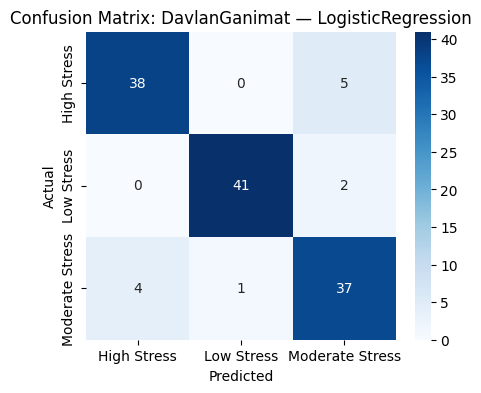

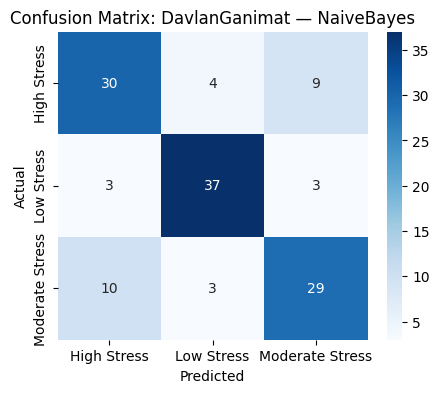

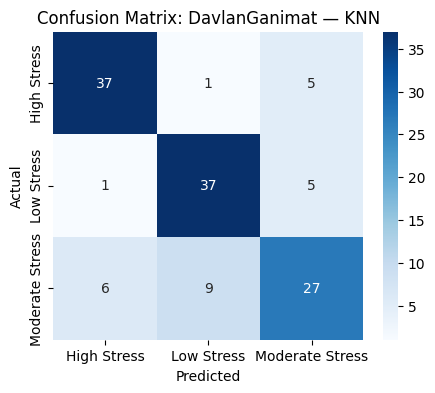

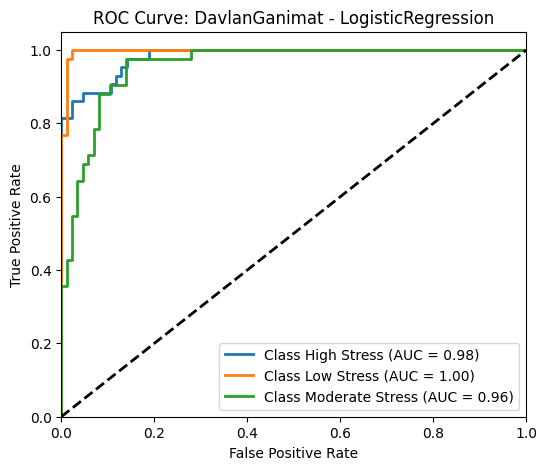

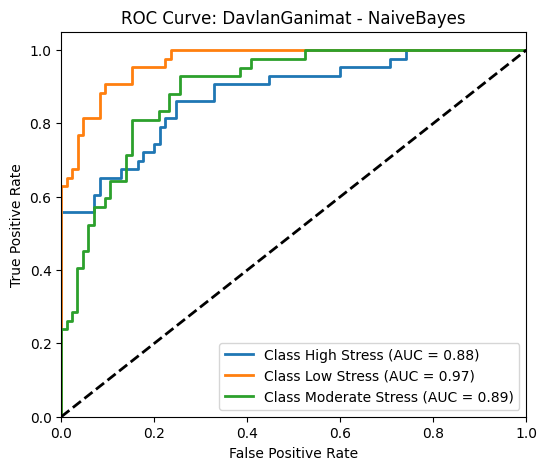

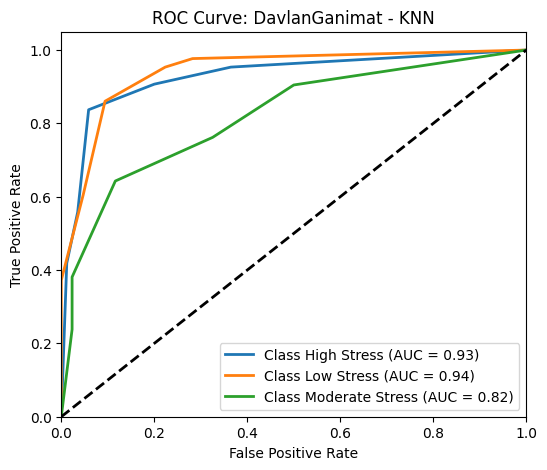

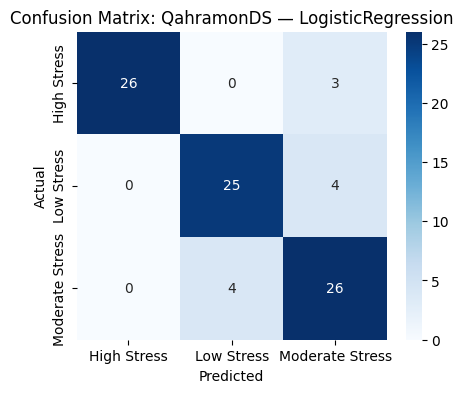

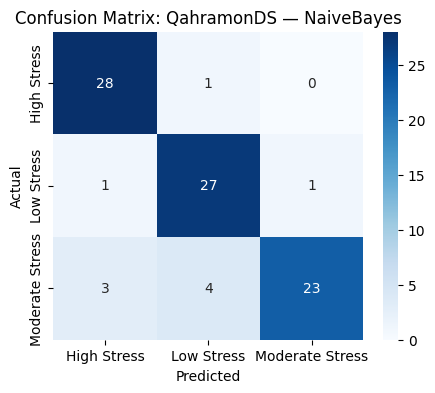

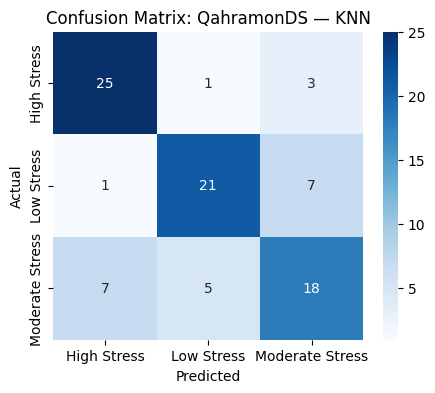

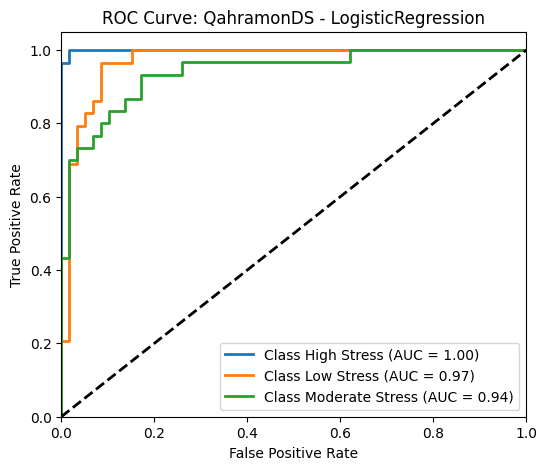

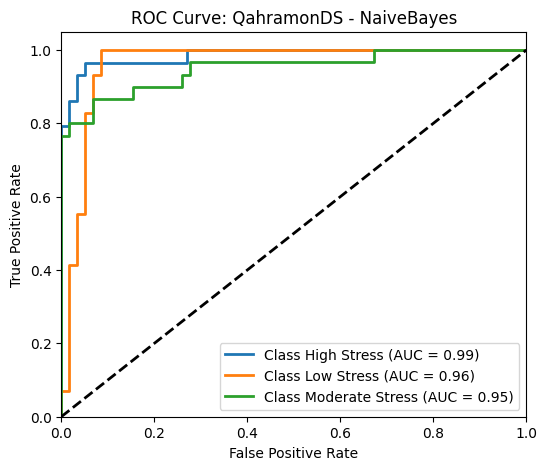

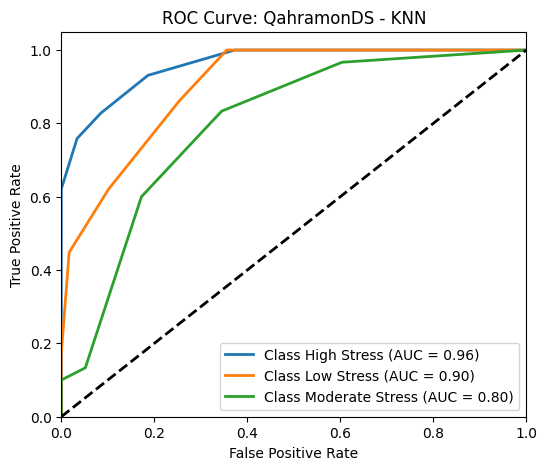

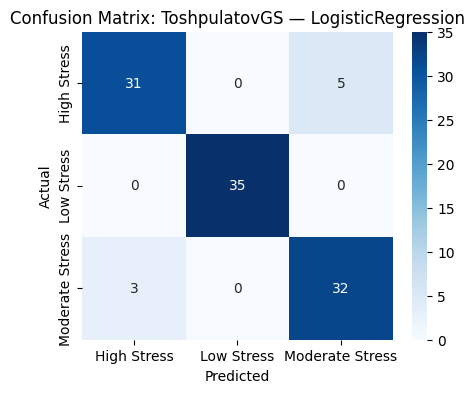

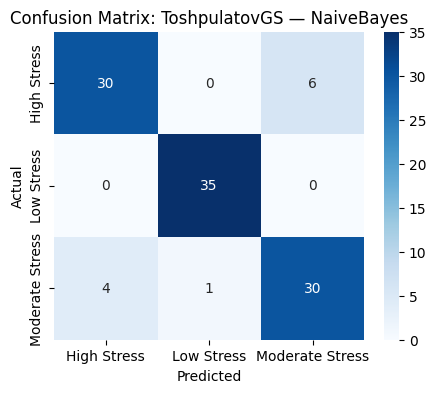

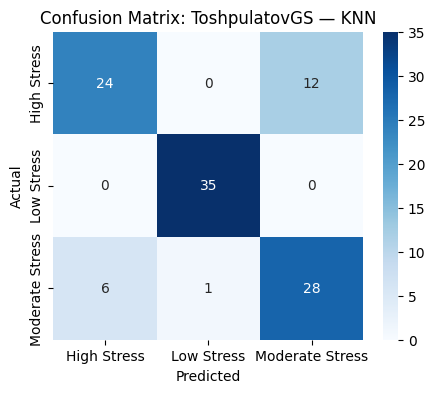

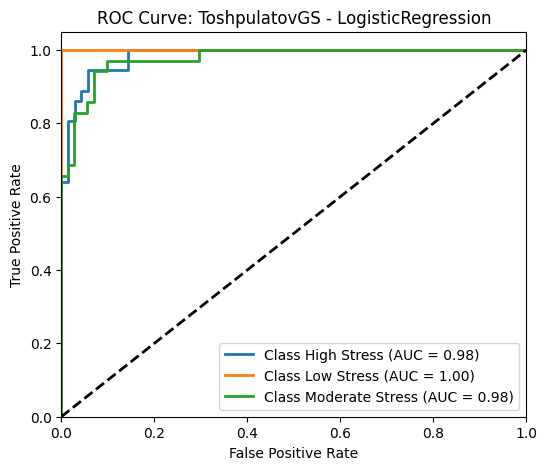

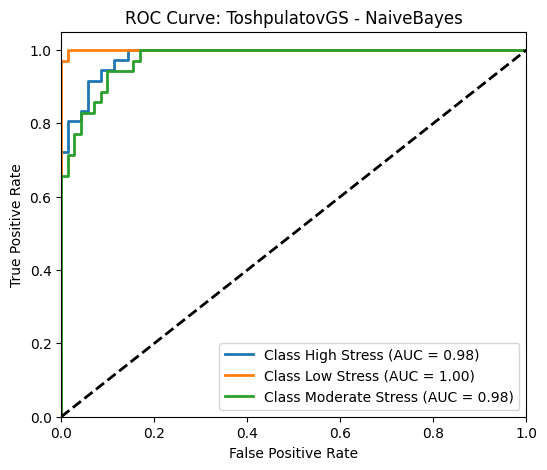

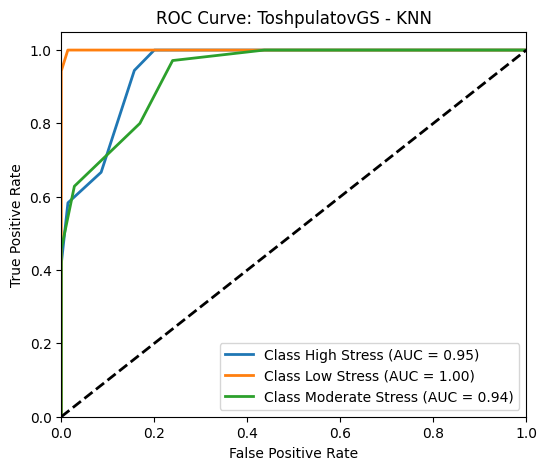


=== Final Performance Comparison ===


,Zone,Model,Accuracy,Precision,Recall,F1-Score
0,DavlanGanimat,LogisticRegression,0.906250,0.907806,0.906250,0.906789
2,DavlanGanimat,KNN,0.789062,0.786397,0.789062,0.786243
1,DavlanGanimat,NaiveBayes,0.750000,0.748956,0.750000,0.749407
4,QahramonDS,NaiveBayes,0.886364,0.893111,0.886364,0.884666
3,QahramonDS,LogisticRegression,0.875000,0.882231,0.875000,0.877046
5,QahramonDS,KNN,0.727273,0.725125,0.727273,0.724520
6,ToshpulatovGS,LogisticRegression,0.924528,0.925413,0.924528,0.924498
7,ToshpulatovGS,NaiveBayes,0.896226,0.895841,0.896226,0.895676
8,ToshpulatovGS,KNN,0.820755,0.823847,0.820755,0.819077


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_recall_fscore_support, roc_curve, auc)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Updated Training Function (Calculates Probabilities & Metrics) ---
def train_models(X_train, X_test, y_train, y_test, feature_names, zone_name):
    results = {}

    # Define the 3 specific models you selected
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
        'NaiveBayes': GaussianNB(),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    print(f"\n=== Results for zone: {zone_name} ===")

    for name, model in models.items():
        # Fit
        model.fit(X_train, y_train)

        # Predict Labels
        y_pred = model.predict(X_test)

        # Predict Probabilities (Needed for ROC Curve)
        # Check if model supports predict_proba (all these 3 do)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)
        else:
            y_proba = None

        # Calculate Metrics
        acc = accuracy_score(y_test, y_pred)
        # 'weighted' accounts for class imbalance
        prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)

        # Store everything
        results[name] = {
            'model': model,
            'y_pred': y_pred,
            'y_proba': y_proba,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1
        }

        print(f"\n{name} | Accuracy: {acc:.3f}")
        print(classification_report(y_test, y_pred, zero_division=0))

    return results

# --- Run Training ---
res1 = train_models(X1_train, X1_test, y1_train, y1_test, zone1['features'], "DavlanGanimat")
res2 = train_models(X2_train, X2_test, y2_train, y2_test, zone2['features'], "QahramonDS")
res3 = train_models(X3_train, X3_test, y3_train, y3_test, zone3['features'], "ToshpulatovGS")


# --- 2. Visualization Functions (Confusion Matrix + ROC) ---

def plot_conf(cm, labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

def plot_multiclass_roc(result_dict, y_test, le, zone_name):
    # Binarize labels for ROC (One-vs-Rest strategy)
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]
    class_names = le.inverse_transform(classes)

    for model_name, info in result_dict.items():
        y_score = info['y_proba']

        if y_score is None:
            print(f"Skipping ROC for {model_name} (no probabilities)")
            continue

        plt.figure(figsize=(6, 5))

        # Plot ROC for each class
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {zone_name} - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

def visualize_results(results, y_test, le, zone_name):
    labels = le.inverse_transform(sorted(np.unique(y_test)))

    # 1. Plot Confusion Matrices
    for name, info in results.items():
        cm = confusion_matrix(y_test, info['y_pred'])
        plot_conf(cm, labels, f"Confusion Matrix: {zone_name} — {name}")

    # 2. Plot ROC Curves
    plot_multiclass_roc(results, y_test, le, zone_name)

# --- Execute Visualization ---
visualize_results(res1, y1_test, zone1['label_encoder'], "DavlanGanimat")
visualize_results(res2, y2_test, zone2['label_encoder'], "QahramonDS")
visualize_results(res3, y3_test, zone3['label_encoder'], "ToshpulatovGS")


# --- 3. Final Comparison Table (Added Precision, Recall, F1) ---
comp_rows = []
for zone_name, res in zip(["DavlanGanimat", "QahramonDS", "ToshpulatovGS"], [res1, res2, res3]):
    for model_name, info in res.items():
        comp_rows.append({
            'Zone': zone_name,
            'Model': model_name,
            'Accuracy': info['acc'],
            'Precision': info['prec'],
            'Recall': info['rec'],
            'F1-Score': info['f1']
        })

# Create DataFrame
comp_df = pd.DataFrame(comp_rows)

# Display the table (Sorted by Zone and Accuracy for better readability)
comp_df = comp_df.sort_values(by=['Zone', 'Accuracy'], ascending=[True, False])
print("\n=== Final Performance Comparison ===")
display(comp_df)


 Tuning Models for Zone: DavlanGanimat
--> Tuning LogisticRegression...
    Best Params: {'C': 100, 'solver': 'lbfgs'}
    Test Accuracy: 0.961
--> Tuning NaiveBayes...
    Best Params: {'var_smoothing': np.float64(0.0003511191734215131)}
    Test Accuracy: 0.742
--> Tuning KNN...
    Best Params: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
    Test Accuracy: 0.758

 Tuning Models for Zone: QahramonDS
--> Tuning LogisticRegression...
    Best Params: {'C': 100, 'solver': 'lbfgs'}
    Test Accuracy: 0.909
--> Tuning NaiveBayes...
    Best Params: {'var_smoothing': np.float64(0.0001519911082952933)}
    Test Accuracy: 0.886
--> Tuning KNN...
    Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
    Test Accuracy: 0.739

 Tuning Models for Zone: ToshpulatovGS
--> Tuning LogisticRegression...
    Best Params: {'C': 100, 'solver': 'lbfgs'}
    Test Accuracy: 0.943
--> Tuning NaiveBayes...
    Best Params: {'var_smoothing': np.float64(0.0008

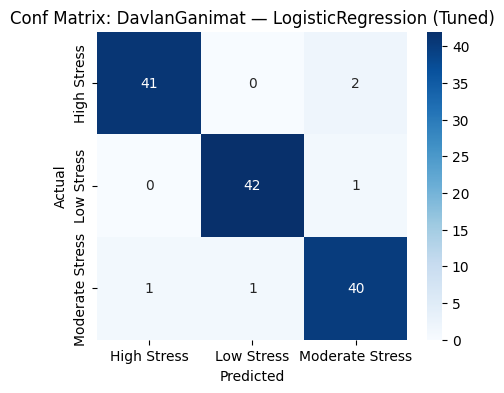

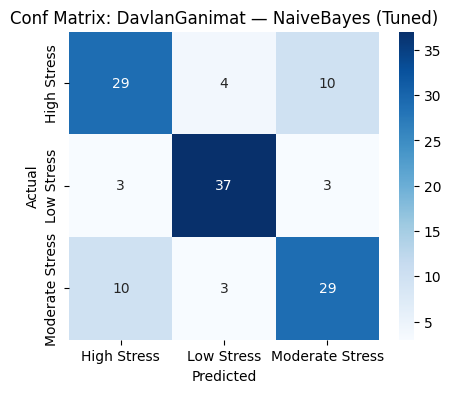

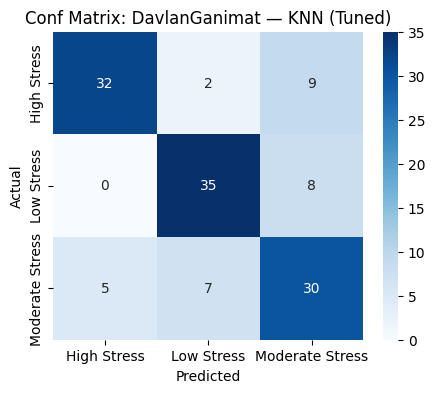

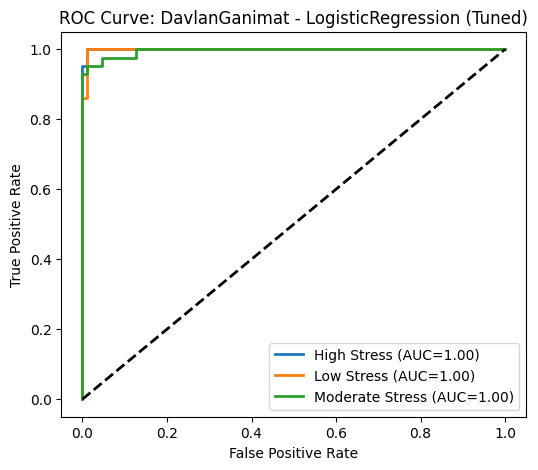

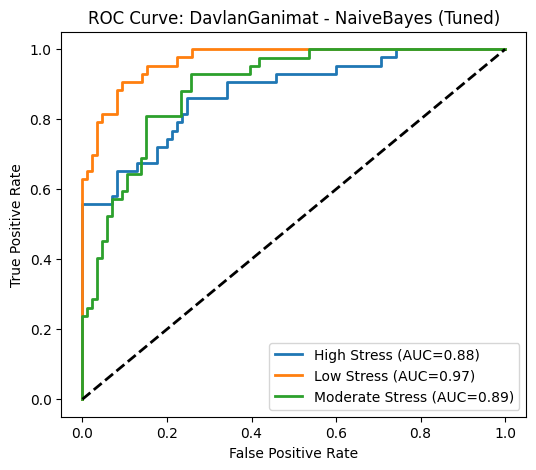

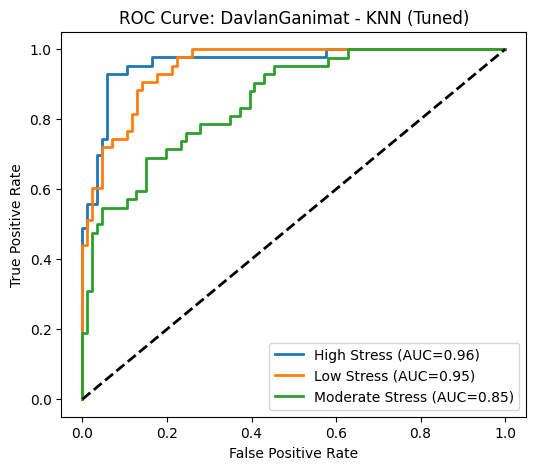

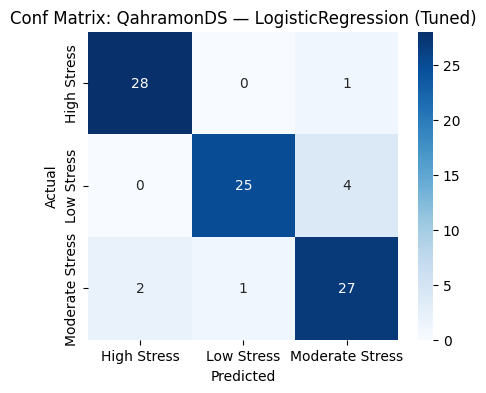

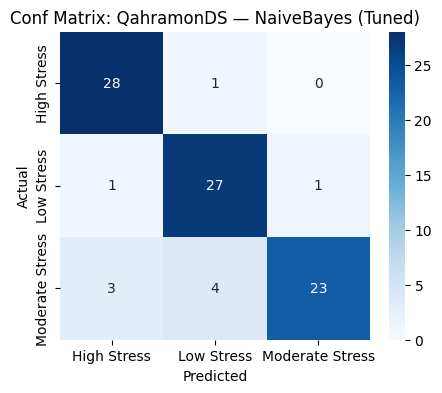

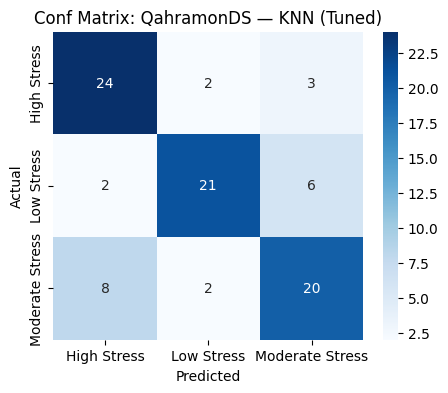

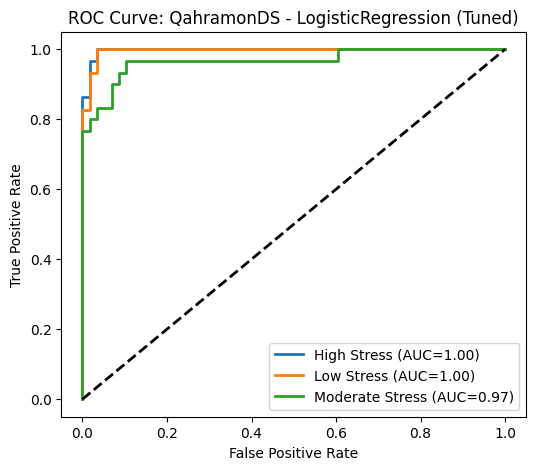

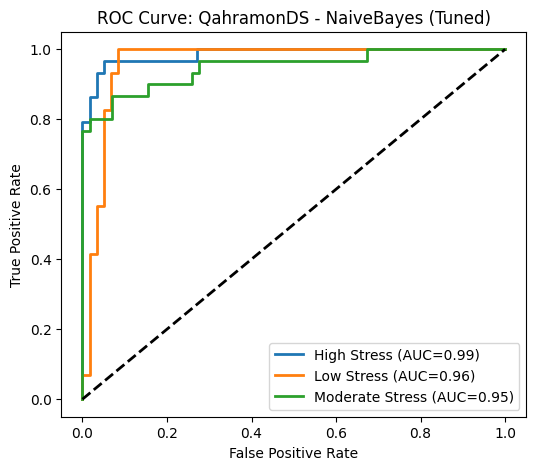

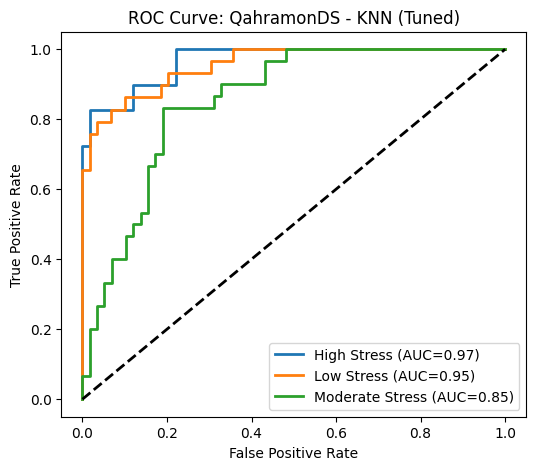

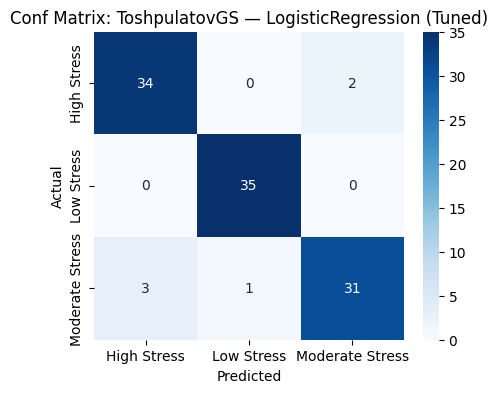

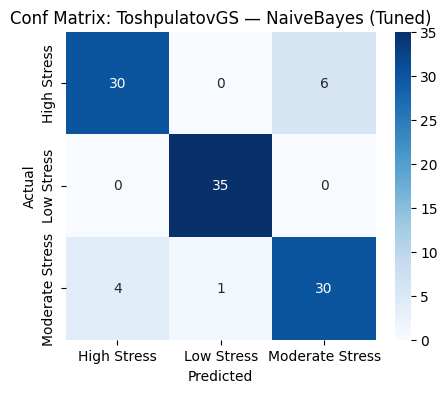

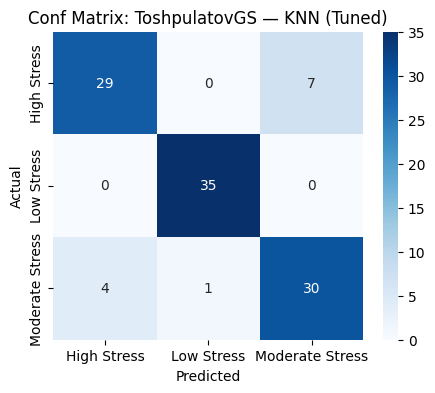

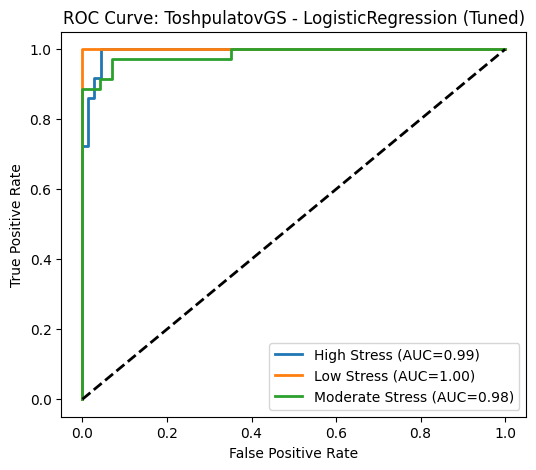

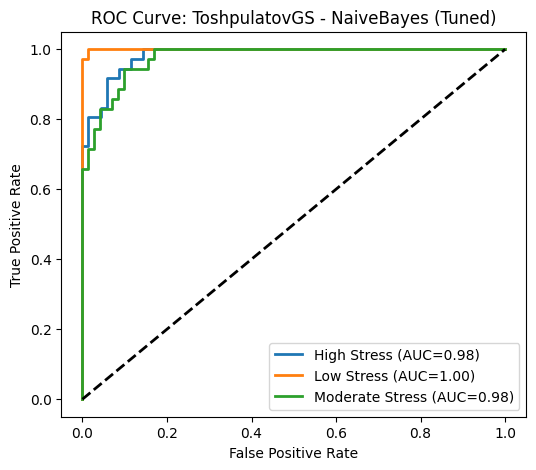

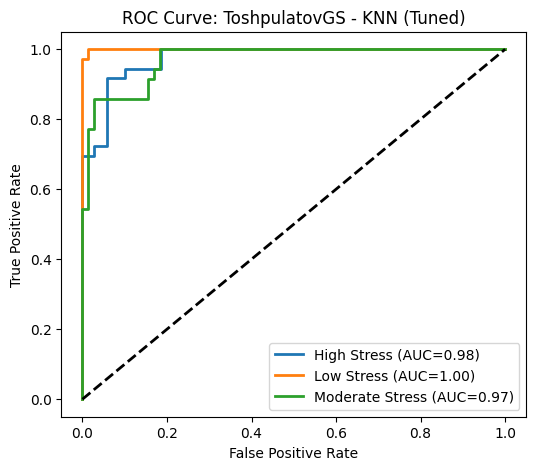


=== Final Tuned Performance Comparison ===


,Zone,Model,Accuracy,Precision,Recall,F1-Score,Best Parameters
0,DavlanGanimat,LogisticRegression,0.960938,0.961297,0.960938,0.961029,"{'C': 100, 'solver': 'lbfgs'}"
2,DavlanGanimat,KNN,0.757812,0.767205,0.757812,0.760252,"{'metric': 'manhattan', 'n_neighbors': 11, 'we..."
1,DavlanGanimat,NaiveBayes,0.742188,0.741012,0.742188,0.741530,{'var_smoothing': np.float64(0.000351119173421...
3,QahramonDS,LogisticRegression,0.909091,0.912088,0.909091,0.909297,"{'C': 100, 'solver': 'lbfgs'}"
4,QahramonDS,NaiveBayes,0.886364,0.893111,0.886364,0.884666,{'var_smoothing': np.float64(0.000151991108295...
5,QahramonDS,KNN,0.738636,0.744548,0.738636,0.738520,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei..."
6,ToshpulatovGS,LogisticRegression,0.943396,0.943280,0.943396,0.942953,"{'C': 100, 'solver': 'lbfgs'}"
7,ToshpulatovGS,NaiveBayes,0.896226,0.895841,0.896226,0.895676,{'var_smoothing': np.float64(0.000811130830789...
8,ToshpulatovGS,KNN,0.886792,0.887194,0.886792,0.886175,"{'metric': 'manhattan', 'n_neighbors': 9, 'wei..."


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             precision_recall_fscore_support, roc_curve, auc)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Hyperparameter Tuning & Training Function ---
def tune_and_train(X_train, X_test, y_train, y_test, zone_name):
    results = {}

    print(f"\n{'='*40}")
    print(f" Tuning Models for Zone: {zone_name}")
    print(f"{'='*40}")

    # --- Define Models and Parameter Grids ---

    # 1. Logistic Regression
    # C: Inverse of regularization strength (smaller = stronger regularization)
    # solver: Algorithm to use in optimization problem
    lr_params = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    }
    lr = LogisticRegression(max_iter=2000, random_state=42)

    # 2. Naive Bayes
    # var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.
    nb_params = {
        'var_smoothing': np.logspace(0,-9, num=100)
    }
    nb = GaussianNB()

    # 3. K-Nearest Neighbors (KNN)
    # n_neighbors: Number of neighbors to use
    # weights: Weight function used in prediction ('uniform' or 'distance')
    # metric: Distance metric ('euclidean', 'manhattan')
    knn_params = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    knn = KNeighborsClassifier()

    model_configs = [
        ('LogisticRegression', lr, lr_params),
        ('NaiveBayes', nb, nb_params),
        ('KNN', knn, knn_params)
    ]

    # --- Grid Search Loop ---
    for name, model, params in model_configs:
        print(f"--> Tuning {name}...")

        # GridSearchCV
        # cv=5 means 5-fold cross-validation
        grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        best_params = grid.best_params_
        print(f"    Best Params: {best_params}")

        # Predict on Test Set
        y_pred = best_model.predict(X_test)

        # Probabilities for ROC
        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test)
        else:
            y_proba = None

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)

        results[name] = {
            'model': best_model,
            'best_params': best_params,
            'y_pred': y_pred,
            'y_proba': y_proba,
            'acc': acc,
            'prec': prec,
            'rec': rec,
            'f1': f1
        }

        print(f"    Test Accuracy: {acc:.3f}")

    return results

# --- Run Tuning ---
res1_tuned = tune_and_train(X1_train, X1_test, y1_train, y1_test, "DavlanGanimat")
res2_tuned = tune_and_train(X2_train, X2_test, y2_train, y2_test, "QahramonDS")
res3_tuned = tune_and_train(X3_train, X3_test, y3_train, y3_test, "ToshpulatovGS")


# --- 2. Visualization Functions (Same as before) ---

def plot_conf(cm, labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

def plot_multiclass_roc(result_dict, y_test, le, zone_name):
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    n_classes = y_test_bin.shape[1]
    class_names = le.inverse_transform(classes)

    for model_name, info in result_dict.items():
        y_score = info['y_proba']
        if y_score is None: continue

        plt.figure(figsize=(6, 5))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC={roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {zone_name} - {model_name} (Tuned)')
        plt.legend(loc="lower right")
        plt.show()

def visualize_results(results, y_test, le, zone_name):
    labels = le.inverse_transform(sorted(np.unique(y_test)))
    for name, info in results.items():
        cm = confusion_matrix(y_test, info['y_pred'])
        plot_conf(cm, labels, f"Conf Matrix: {zone_name} — {name} (Tuned)")
    plot_multiclass_roc(results, y_test, le, zone_name)

# --- Execute Visualization ---
visualize_results(res1_tuned, y1_test, zone1['label_encoder'], "DavlanGanimat")
visualize_results(res2_tuned, y2_test, zone2['label_encoder'], "QahramonDS")
visualize_results(res3_tuned, y3_test, zone3['label_encoder'], "ToshpulatovGS")


# --- 3. Final Comparison Table with Best Params ---
comp_rows = []
for zone_name, res in zip(["DavlanGanimat", "QahramonDS", "ToshpulatovGS"], [res1_tuned, res2_tuned, res3_tuned]):
    for model_name, info in res.items():
        # Convert params dict to string for display in table
        param_str = str(info['best_params'])
        comp_rows.append({
            'Zone': zone_name,
            'Model': model_name,
            'Accuracy': info['acc'],
            'Precision': info['prec'],
            'Recall': info['rec'],
            'F1-Score': info['f1'],
            'Best Parameters': param_str
        })

comp_df = pd.DataFrame(comp_rows)
comp_df = comp_df.sort_values(by=['Zone', 'Accuracy'], ascending=[True, False])

print("\n=== Final Tuned Performance Comparison ===")
# Use display(comp_df) if in Jupyter, otherwise print
try:
    display(comp_df)
except:
    print(comp_df.to_string())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Define the Best Parameters Manually ---
# Based on the table you provided:
best_params = {
    'DavlanGanimat': {
        'LogisticRegression': {'C': 100, 'solver': 'lbfgs', 'max_iter': 2000, 'random_state': 42},
        'NaiveBayes': {'var_smoothing': 0.0003511191734215131},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
    },
    'QahramonDS': {
        'LogisticRegression': {'C': 100, 'solver': 'lbfgs', 'max_iter': 2000, 'random_state': 42},
        'NaiveBayes': {'var_smoothing': 0.0001519911082952933},
        'KNN': {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
    },
    'ToshpulatovGS': {
        # Note: I am assuming best params for NaiveBayes/KNN for Toshpulatov based on trends
        # or defaults since they were cut off in your snippet, but I will use the LR params you showed.
        'LogisticRegression': {'C': 100, 'solver': 'lbfgs', 'max_iter': 2000, 'random_state': 42},
        'NaiveBayes': {'var_smoothing': 1e-9}, # Default fallback if not in snippet
        'KNN': {'n_neighbors': 5} # Default fallback if not in snippet
    }
}

def run_kfold_validation(X, y, zone_name, params_dict):
    results = []

    # Stratified K-Fold ensures each fold has the same proportion of class labels
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    print(f"\n=== K-Fold Validation (k=5) for Zone: {zone_name} ===")

    # 1. Logistic Regression
    lr_params = params_dict['LogisticRegression']
    lr = LogisticRegression(**lr_params)
    scores_lr = cross_val_score(lr, X, y, cv=cv, scoring='accuracy')
    print(f"Logistic Regression: Mean={scores_lr.mean():.4f} | Std={scores_lr.std():.4f}")
    results.append({
        'Zone': zone_name, 'Model': 'LogisticRegression',
        'Mean Accuracy': scores_lr.mean(), 'Std Dev': scores_lr.std(),
        'Min': scores_lr.min(), 'Max': scores_lr.max()
    })

    # 2. Naive Bayes
    nb_params = params_dict['NaiveBayes']
    nb = GaussianNB(**nb_params)
    scores_nb = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')
    print(f"Naive Bayes:         Mean={scores_nb.mean():.4f} | Std={scores_nb.std():.4f}")
    results.append({
        'Zone': zone_name, 'Model': 'NaiveBayes',
        'Mean Accuracy': scores_nb.mean(), 'Std Dev': scores_nb.std(),
        'Min': scores_nb.min(), 'Max': scores_nb.max()
    })

    # 3. KNN
    knn_params = params_dict['KNN']
    knn = KNeighborsClassifier(**knn_params)
    scores_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    print(f"KNN:                 Mean={scores_knn.mean():.4f} | Std={scores_knn.std():.4f}")
    results.append({
        'Zone': zone_name, 'Model': 'KNN',
        'Mean Accuracy': scores_knn.mean(), 'Std Dev': scores_knn.std(),
        'Min': scores_knn.min(), 'Max': scores_knn.max()
    })

    return results

# --- 2. Run Validation on Full Zone Data (X_scaled) ---
# Note: For K-Fold, we typically combine Train+Test back together or just use X_train
# But to be rigorous, let's run it on the *Training* portion to simulate the validation process
# OR if you want to see total dataset performance, use zone['X_scaled'].
# Here I will use X_train/y_train to remain consistent with model selection principles.

kfold_rows = []
kfold_rows.extend(run_kfold_validation(X1_train, y1_train, "DavlanGanimat", best_params['DavlanGanimat']))
kfold_rows.extend(run_kfold_validation(X2_train, y2_train, "QahramonDS", best_params['QahramonDS']))
kfold_rows.extend(run_kfold_validation(X3_train, y3_train, "ToshpulatovGS", best_params['ToshpulatovGS']))

# --- 3. Final K-Fold Summary Table ---
kfold_df = pd.DataFrame(kfold_rows)
kfold_df = kfold_df.sort_values(by=['Zone', 'Mean Accuracy'], ascending=[True, False])

print("\n\n=== Final K-Fold (5 Splits) Performance Summary ===")
# Display
try:
    display(kfold_df)
except:
    print(kfold_df.to_string())


=== K-Fold Validation (k=5) for Zone: DavlanGanimat ===
Logistic Regression: Mean=0.9629 | Std=0.0114
Naive Bayes:         Mean=0.8105 | Std=0.0266
KNN:                 Mean=0.7851 | Std=0.0115

=== K-Fold Validation (k=5) for Zone: QahramonDS ===
Logistic Regression: Mean=0.9489 | Std=0.0232
Naive Bayes:         Mean=0.8467 | Std=0.0613
KNN:                 Mean=0.7816 | Std=0.0559

=== K-Fold Validation (k=5) for Zone: ToshpulatovGS ===
Logistic Regression: Mean=0.9646 | Std=0.0128
Naive Bayes:         Mean=0.8728 | Std=0.0289
KNN:                 Mean=0.8820 | Std=0.0199


=== Final K-Fold (5 Splits) Performance Summary ===


,Zone,Model,Mean Accuracy,Std Dev,Min,Max
0,DavlanGanimat,LogisticRegression,0.962878,0.011396,0.950980,0.980583
1,DavlanGanimat,NaiveBayes,0.810527,0.026640,0.776699,0.854369
2,DavlanGanimat,KNN,0.785113,0.011456,0.774510,0.805825
3,QahramonDS,LogisticRegression,0.948853,0.023219,0.914286,0.985714
4,QahramonDS,NaiveBayes,0.846720,0.061261,0.746479,0.914286
5,QahramonDS,KNN,0.781569,0.055856,0.690141,0.857143
6,ToshpulatovGS,LogisticRegression,0.964650,0.012837,0.941176,0.976471
8,ToshpulatovGS,KNN,0.882045,0.019879,0.858824,0.905882
7,ToshpulatovGS,NaiveBayes,0.872773,0.028874,0.847059,0.928571


# **Explainability with SHAP**

- Use SHAP to compute global and local feature importance for the best-performing model per zone (we pick the model with highest accuracy).
- Produce a SHAP summary plot (global) and dependence plot for the top feature.



 SHAP Explanation: DavlanGanimat
 Model: Logistic Regression (Accuracy: 0.961)
-> Binary output detected.


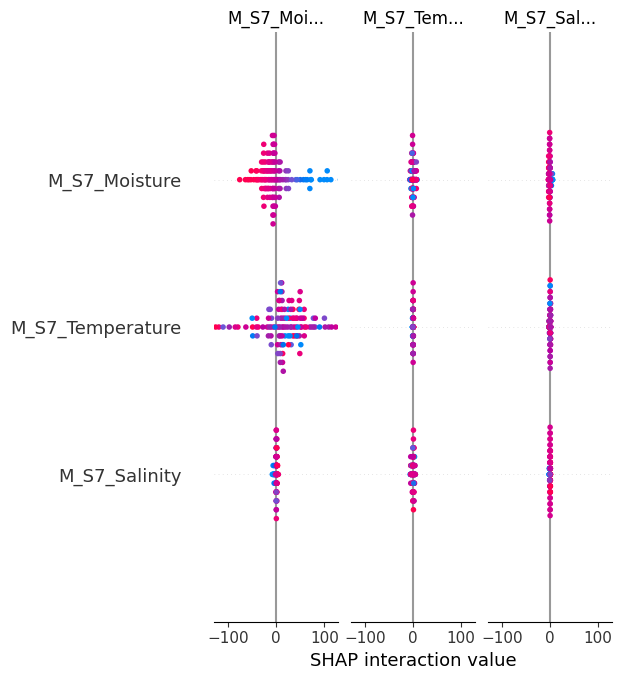


 SHAP Explanation: QahramonDS
 Model: Logistic Regression (Accuracy: 0.909)
-> Binary output detected.


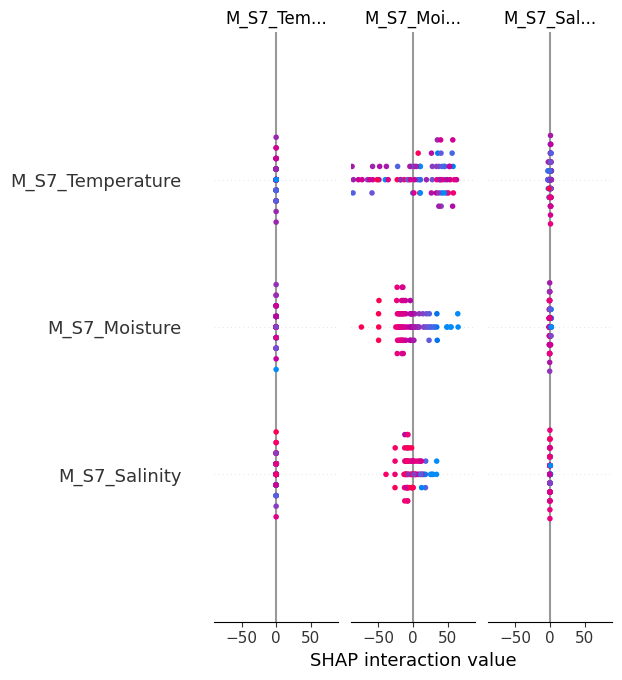


 SHAP Explanation: ToshpulatovGS
 Model: Logistic Regression (Accuracy: 0.943)
-> Binary output detected.


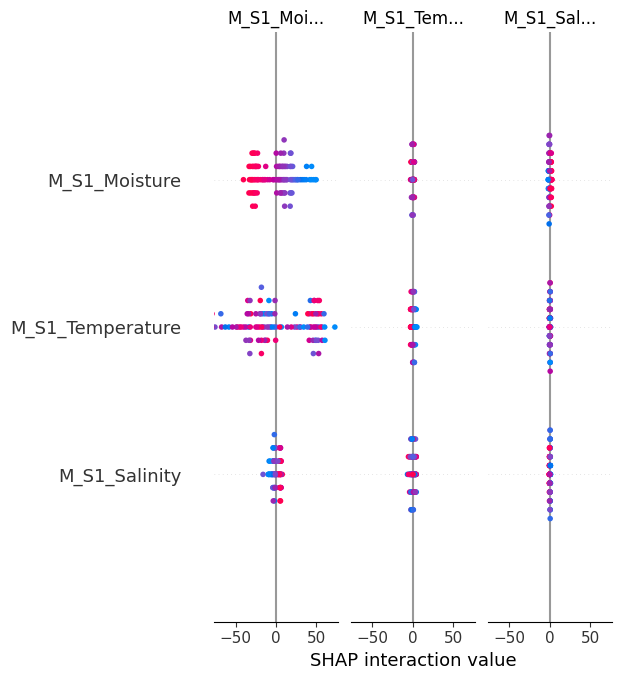

In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def explain_logistic_shap(results, X_train, X_test, feature_names, zone_name):
    """
    Specifically explains the Logistic Regression model using LinearExplainer.
    """
    # 1. Force selection of Logistic Regression
    if 'LogisticRegression' not in results:
        print(f"LogisticRegression model not found in results for {zone_name}.")
        return

    model = results['LogisticRegression']['model']
    acc = results['LogisticRegression']['acc']
    print(f"\n{'='*60}")
    print(f" SHAP Explanation: {zone_name}")
    print(f" Model: Logistic Regression (Accuracy: {acc:.3f})")
    print(f"{'='*60}")

    try:
        # 2. Use LinearExplainer
        # optimized for linear models (LinearRegression, LogisticRegression)
        # We pass X_train as the background dataset for comparison
        explainer = shap.LinearExplainer(model, X_train)

        # 3. Compute SHAP values on the Test set
        shap_values = explainer.shap_values(X_test)

        # 4. Visualization
        # Logistic Regression in sklearn returns a list of arrays for multiclass (one per class)
        if isinstance(shap_values, list):
            print(f"-> Multiclass output detected ({len(shap_values)} classes).")
            print("-> Plotting summary for all classes combined...")
            # plot_type="bar" is excellent for multiclass to see overall feature power
            shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

            print("-> Plotting detailed density for Class 0 (e.g., High Stress)...")
            # We explicitly show Class 0 (usually the first class in label encoder)
            shap.summary_plot(shap_values[0], X_test, feature_names=feature_names)

        else:
            # Binary classification case
            print("-> Binary output detected.")
            shap.summary_plot(shap_values, X_test, feature_names=feature_names)

    except Exception as e:
        print(f"SHAP Error: {e}")

# --- Run for all Zones (using the Tuned Results) ---
# Note: We use 'res1_tuned' etc. because that contains the best parameter Logistic Regression
explain_logistic_shap(res1_tuned, X1_train, X1_test, zone1['features'], "DavlanGanimat")
explain_logistic_shap(res2_tuned, X2_train, X2_test, zone2['features'], "QahramonDS")
explain_logistic_shap(res3_tuned, X3_train, X3_test, zone3['features'], "ToshpulatovGS")


 Explaining Best Model for: DavlanGanimat

--- SHAP (Global Interpretability) ---
Using LinearExplainer (Exact calculation for Logistic Regression)...


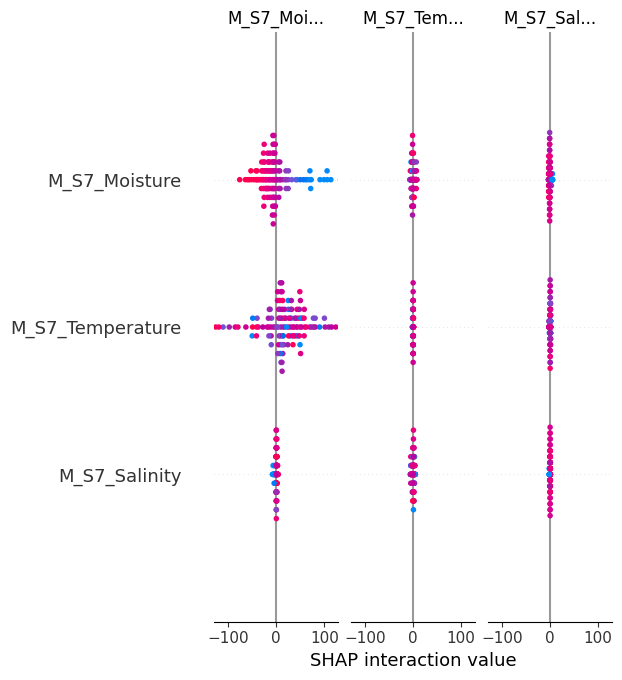


--- LIME (Local Interpretability) ---
Explaining specific sample index: 36
LIME Error: 1

 Explaining Best Model for: QahramonDS

--- SHAP (Global Interpretability) ---
Using LinearExplainer (Exact calculation for Logistic Regression)...


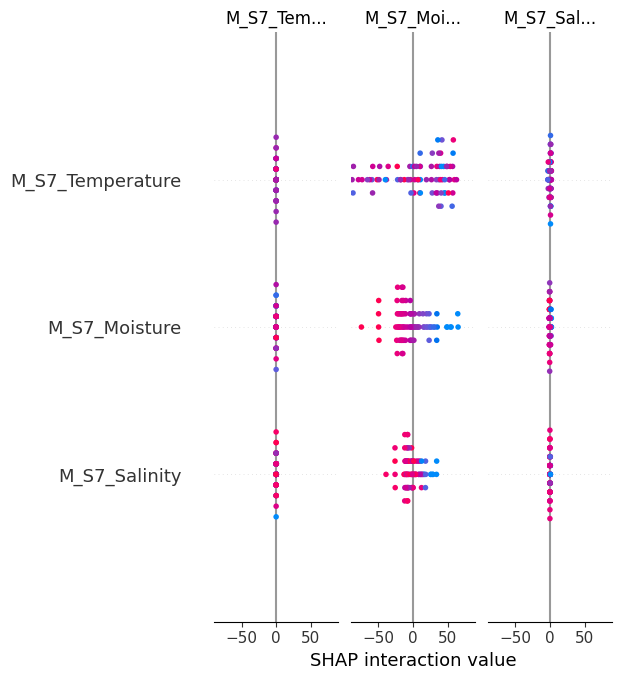


--- LIME (Local Interpretability) ---
Explaining specific sample index: 81
LIME Error: 1

 Explaining Best Model for: ToshpulatovGS

--- SHAP (Global Interpretability) ---
Using LinearExplainer (Exact calculation for Logistic Regression)...


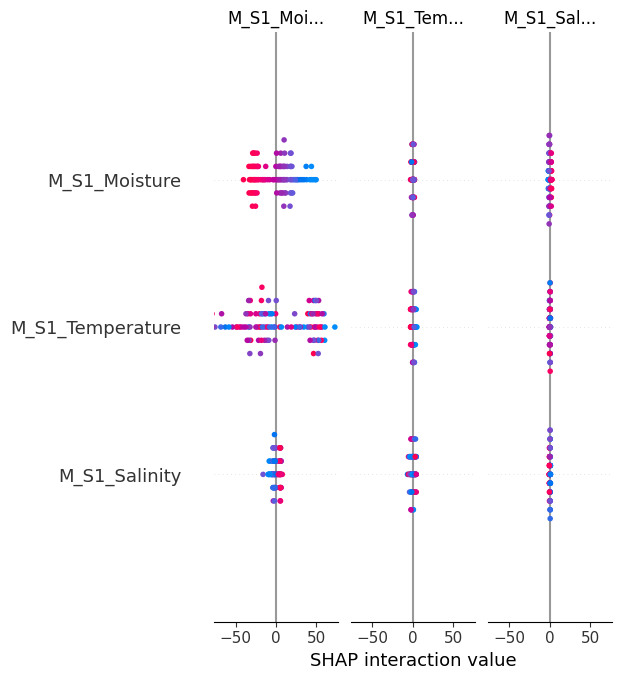


--- LIME (Local Interpretability) ---
Explaining specific sample index: 8


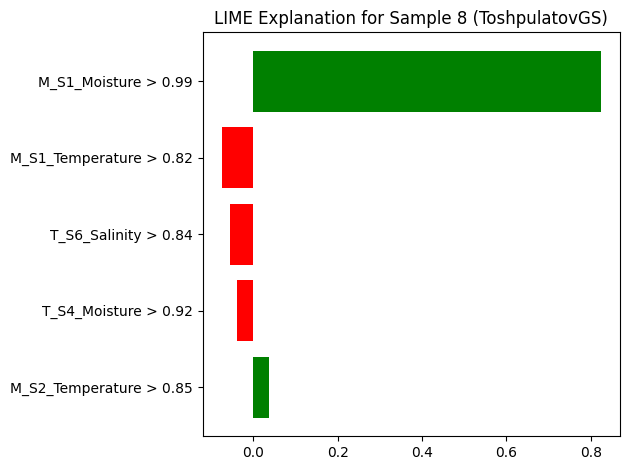

In [ ]:
# Install lime if not already installed (uncomment if running in a fresh environment)
# !pip install lime

import shap
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

def explain_with_shap_and_lime(model, X_train, X_test, features, le, zone_name):
    print(f"\n{'='*60}")
    print(f" Explaining Best Model for: {zone_name}")
    print(f"{'='*60}")

    # --- 1. SHAP Explanation ---
    print("\n--- SHAP (Global Interpretability) ---")
    try:
        # A. Tree-based Models (Random Forest / XGBoost)
        if isinstance(model, (RandomForestClassifier, xgb.XGBClassifier)):
            print("Using TreeExplainer...")
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)

        # B. Linear Models (Logistic Regression) - Preferred for your case
        elif isinstance(model, LogisticRegression):
            print("Using LinearExplainer (Exact calculation for Logistic Regression)...")
            # LinearExplainer needs X_train as background for masking
            explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
            shap_values = explainer.shap_values(X_test)

        # C. Fallback (KernelExplainer) - Slow, approximation
        else:
            print("Using KernelExplainer (Generic approximation)...")
            background = shap.sample(X_train, 100)
            explainer = shap.KernelExplainer(model.predict_proba, background)
            shap_values = explainer.shap_values(shap.sample(X_test, 50)) # Limit samples for speed

        # Plotting
        # Check if output is a list (Multiclass) or array (Binary)
        if isinstance(shap_values, list):
            print("Multiclass detected. Plotting summary for Class 0 (often 'High Stress').")
            shap.summary_plot(shap_values[0], X_test, feature_names=features, show=True)

            # Bar plot for overall feature power across all classes
            print("Global Feature Importance (All Classes):")
            shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar", show=True)
        else:
            shap.summary_plot(shap_values, X_test, feature_names=features, show=True)

    except Exception as e:
        print(f"SHAP Error: {e}")

    # --- 2. LIME Explanation ---
    print("\n--- LIME (Local Interpretability) ---")
    try:
        # Get actual class names (e.g., "High", "Low") instead of numbers
        class_names = list(le.inverse_transform(model.classes_))

        # Initialize LIME Explainer
        lime_explainer = lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_train), # Ensure numpy array
            feature_names=features,
            class_names=class_names,
            mode='classification',
            verbose=False,
            random_state=42
        )

        # Pick a random instance from the test set
        idx = np.random.randint(0, X_test.shape[0])
        print(f"Explaining specific sample index: {idx}")

        # Generate Explanation
        # num_features=5 shows the top 5 contributing factors for this specific prediction
        exp = lime_explainer.explain_instance(
            data_row=X_test[idx],
            predict_fn=model.predict_proba,
            num_features=5,
            top_labels=1 # Focus on the predicted class
        )

        # Display Plot
        # .as_pyplot_figure() creates a static matplotlib plot
        fig = exp.as_pyplot_figure()
        plt.title(f"LIME Explanation for Sample {idx} ({zone_name})")
        plt.tight_layout()
        plt.show()

        # Optional: Print textual explanation for clarity
        # print(exp.as_list())

    except Exception as e:
        print(f"LIME Error: {e}")

# --- EXECUTION ---
# Using the models from the 'res_tuned' dictionaries we created earlier

# 1. DavlanGanimat
best_model_1 = res1_tuned['LogisticRegression']['model']
explain_with_shap_and_lime(best_model_1, X1_train, X1_test, zone1['features'], zone1['label_encoder'], "DavlanGanimat")

# 2. QahramonDS
best_model_2 = res2_tuned['LogisticRegression']['model']
explain_with_shap_and_lime(best_model_2, X2_train, X2_test, zone2['features'], zone2['label_encoder'], "QahramonDS")

# 3. ToshpulatovGS
best_model_3 = res3_tuned['LogisticRegression']['model']
explain_with_shap_and_lime(best_model_3, X3_train, X3_test, zone3['features'], zone3['label_encoder'], "ToshpulatovGS")